<a href="https://colab.research.google.com/github/niltontac/EspAnalise-EngDados/blob/master/Amazon_Fires_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sobre este Conjunto de Dados**

Os olhos do Brasil e do mundo se voltam para a maior floresta tropical e maior reserva de biodiversidade da terra. O bioma é o mais afetado pela onda de incêndios florestais no país ao longo dos anos. 
Não há novidade no fenômeno em si. A Amazonia sempre sofreu com incêncios. Essa prática provoca degradação físico-química e biológica do solo, e traz prejuízos ao meio ambiente.

Este relatório tem o objetivo de ajudar a compreender, através de um conjunto de dados, a frequência de casos de incêndios florestais e fornecer informações que revelem mais precisamente quais os estados que sofrem mais com esses incêndios ao longo de aproximadamente 20 anos.


# Aluno | Analista: Nilton Thiago de Andrade Coura
### Especialização em Análise e Engenharia de Dados - Cesar School/CInUFPE
#### Disciplina: Introdução à Análise de Dados
##### Professor: Luciano Barbosa


######Fonte dos dados: arquivo amazon.csv disponível em https://www.kaggle.com/gustavomodelli/forest-fires-in-brazil

# Carregando o arquivo e consultando as informações básicas do DataFrame

In [0]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [0]:
# Carregando conjunto de dados do arquivo 
dataset=pd.read_csv("https://raw.githubusercontent.com/niltontac/EspAnalise-EngDados/master/data/Amazon_Fires_Dataset.csv",encoding = "ISO-8859-1")

In [0]:
# Forma do DataFrame
dataset.shape

(6454, 5)

In [0]:
# Informação do DataFrame
# Índice de entradas (6454) e colunas (5)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
year      6454 non-null int64
state     6454 non-null object
month     6454 non-null object
number    6454 non-null float64
date      6454 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


## Describe, Head, Tail e Unique

In [0]:
# Resumo da forma de distribuição do conjunto dos dados carregados
# onde temos 6454 registros para observação 
# média, desvio padrão, mínimo, máximo, e quantis.
dataset.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [0]:
# Visualizando as primeiras linhas 
dataset.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [0]:
# Visualizando as últimas linhas
dataset.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [0]:
# Visualizando o intervalo dos anos
dataset.year.unique()

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [0]:
# Visualizando os estados
dataset.state.unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [0]:
# Visualizando os meses
dataset.month.unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

# Analizando, explorando, tratando e visualizando os dados do DataFrame

######Após consultarmos acima algumas informações básicas do DataFrame, vamos agora de fato explorar os dados, realizar as análises e tratamentos necessários desses dados, além de visualizá-los através de gráficos:

##Verificando e definindo os tipos de dados

In [0]:
# Tipos de Dados
dataset.dtypes

year        int64
state      object
month      object
number    float64
date       object
dtype: object

###### Setando os dados como categóricos

In [0]:
# Ajustando os tipos de dados setando como categoricos as colunas "state" e "month"
dataset.state = dataset.state.astype('category')
dataset.month = dataset.month.astype('category')
dataset.dtypes

year         int64
state     category
month     category
number     float64
date        object
dtype: object

Em nova consulta sobre as informações do DataFrame, constata-se que o tratamento realizado no ajuste dos tipos de dados otimizou consideravelmente o espaço em memória, que caiu de 252.2KB (observe em consulta pouco mais acima) para para 165.2KB (consulta abaixo):

In [0]:
# Informação do DataFrame após ajustar os tipos de daddos
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
year      6454 non-null int64
state     6454 non-null category
month     6454 non-null category
number    6454 non-null float64
date      6454 non-null object
dtypes: category(2), float64(1), int64(1), object(1)
memory usage: 165.2+ KB


## Limpando e tratando os dados

Verificando e tratando dados ausentes e/ou duplicados

In [0]:
# Verificando se há dados ausentes no DataFrame para serem tratados 
dataset.isna().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [0]:
dataset.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

Como verificado acima, neste DataFrame não existem dados ausentes ou nulos a serem tratados. Agora, vamos verificar se existem dados duplicados:

In [0]:
dataset[dataset.duplicated(keep=False)]

,year,state,month,number,date
258,2017,Alagoas,Janeiro,38.0,2017-01-01
259,2017,Alagoas,Janeiro,38.0,2017-01-01
2391,1998,Mato Grosso,Janeiro,0.0,1998-01-01
2411,1998,Mato Grosso,Fevereiro,0.0,1998-01-01
2431,1998,Mato Grosso,Março,0.0,1998-01-01
2451,1998,Mato Grosso,Abril,0.0,1998-01-01
2471,1998,Mato Grosso,Maio,0.0,1998-01-01
2630,1998,Mato Grosso,Janeiro,0.0,1998-01-01
2650,1998,Mato Grosso,Fevereiro,0.0,1998-01-01
2670,1998,Mato Grosso,Março,0.0,1998-01-01


Como verificado acima, existem 32 dados duplicados no DataFrame. Excluíndo os registros duplicados e realizando nova verificação, observamos abaixo que pelo índice agora temos 6422 entradas após exclusão dos dados duplicados.

In [0]:
# Exluíndo dados duplicados
dataset.drop_duplicates(inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6422 entries, 0 to 6453
Data columns (total 5 columns):
year      6422 non-null int64
state     6422 non-null category
month     6422 non-null category
number    6422 non-null float64
date      6422 non-null object
dtypes: category(2), float64(1), int64(1), object(1)
memory usage: 214.4+ KB


A coluna "date" do DataFrame não será necessária, pois já existem as colunas "year" e "month" que fornecem informações em relação a períodos. Logo, a coluna "date" será excluída. 

In [0]:
#Excluíndo a coluna 'date'
dataset.drop('date', axis=1, inplace=True)
dataset.head()

,year,state,month,number
0,1998,Acre,Janeiro,0.0
1,1999,Acre,Janeiro,0.0
2,2000,Acre,Janeiro,0.0
3,2001,Acre,Janeiro,0.0
4,2002,Acre,Janeiro,0.0


## Correlação

Abaixo a correlação do DataFrame pelos coeficientes de Spearman e Pearson:

In [0]:
# spearman 
dataset.corr(method='spearman')


,year,number
year,1.000000,0.149714
number,0.149714,1.000000


In [0]:
# pearson
dataset.corr(method='pearson')

,year,number
year,1.0000,0.0626
number,0.0626,1.0000


Abaixo mostramos um gráfico indicando a correlação positiva entre os atributos das colunas "year" (ano) e "number" (número de casos de incêndios): 

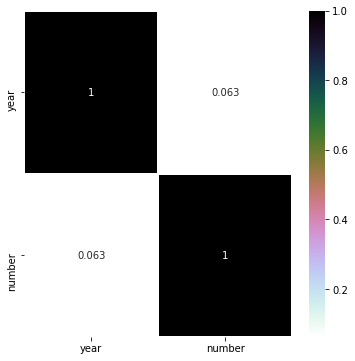

In [0]:
plt.figure(figsize = (6,6))
sns.heatmap(dataset.corr(),annot = True,linewidths = 1.0,cmap='cubehelix_r');

## Aplicando a Normalização

A coluna 'number' está assim distribuída: 

In [0]:
dataset['number'].describe()

count    6422.000000
mean      108.815178
std       191.142482
min         0.000000
25%         3.000000
50%        24.497000
75%       114.000000
max       998.000000
Name: number, dtype: float64

Padronizando e imputando os dados normalizados

Abaixo temos a normalização aplicada por meio da técnica de padronização transformando os dados da coluna 'number' e imputando os dados padronizados para a uma nova coluna 'number_norm':

In [0]:
# Normalizando e imputando os dados
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
dataset['number_norm'] = scaler.fit_transform(dataset[['number']])
dataset['number_norm'].describe()

count    6422.000000
mean        0.109033
std         0.191526
min         0.000000
25%         0.003006
50%         0.024546
75%         0.114228
max         1.000000
Name: number_norm, dtype: float64

In [0]:
# Desvio padrão padronizado para 1
scaler = StandardScaler()
dataset['number_norm'] = scaler.fit_transform(dataset[['number']])
dataset['number_norm'].describe()

count    6.422000e+03
mean     3.031093e-16
std      1.000078e+00
min     -5.693326e-01
25%     -5.536363e-01
50%     -4.411617e-01
75%      2.712754e-02
max      4.652310e+00
Name: number_norm, dtype: float64

## Aplicando a Discretização

Montando 8 intervalos da coluna 'number':

In [0]:
#Intervalos
dataset['number_range'] = pd.cut(dataset['number'],8)
dataset['number_range'].value_counts()

(-0.998, 124.75]    4908
(124.75, 249.5]      627
(249.5, 374.25]      287
(374.25, 499.0]      198
(499.0, 623.75]      129
(623.75, 748.5]      107
(748.5, 873.25]       85
(873.25, 998.0]       81
Name: number_range, dtype: int64

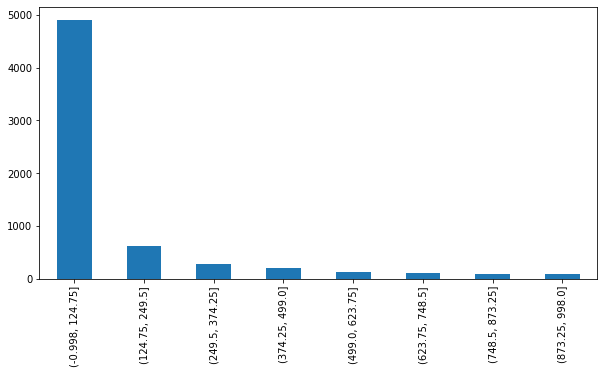

In [0]:
#Gráfico que mostra os 8 intervalos
counts = dataset['number_range'].value_counts()
counts.plot.bar(figsize=(10,5))

In [0]:
# Descrevendo a coluna 'number'
dataset['number'].describe()

count    6422.000000
mean      108.815178
std       191.142482
min         0.000000
25%         3.000000
50%        24.497000
75%       114.000000
max       998.000000
Name: number, dtype: float64

In [0]:
# Realizando a Discretização da coluna 'number' 
dataset['number_range_disc'] = pd.qcut(dataset['number'],8)
dataset['number_range_disc'].value_counts()

(-0.001, 1.0]     831
(3.0, 9.0]        807
(24.497, 54.0]    805
(1.0, 3.0]        805
(54.0, 114.0]     804
(278.0, 998.0]    801
(114.0, 278.0]    801
(9.0, 24.497]     768
Name: number_range_disc, dtype: int64

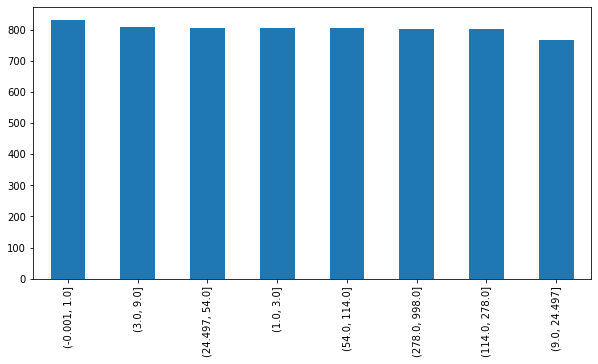

In [0]:
# Gráfico com os dados discretizados
counts = dataset['number_range_disc'].value_counts()
counts.plot.bar(figsize=(10,5))

## Estatísticas descritivas com visualização dos dados

Detectando e tratando outliers

Utilizando o método z-score robusto na coluna 'number'

In [0]:
# Descrevendo a coluna "number", onde são atribuídos todos os casos de incêndios
# registrados
dataset['number'].describe()

count    6422.000000
mean      108.815178
std       191.142482
min         0.000000
25%         3.000000
50%        24.497000
75%       114.000000
max       998.000000
Name: number, dtype: float64

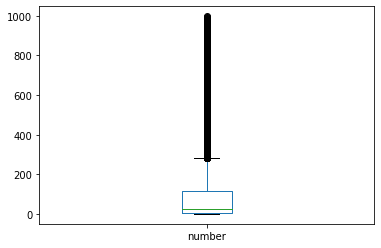

In [0]:
dataset['number'].plot.box()

In [0]:
dataset2 = dataset
mad = abs(dataset2['number'] - dataset2['number'].median()).median()*(1/0.6745)
print(mad)

34.83617494440326


In [0]:
dataset3 = dataset2[abs(dataset2['number']-dataset2['number'].median())/mad < 3.5]
print(len(dataset3))

5064


In [0]:
dataset3['number'].describe()

count    5064.000000
mean       28.784177
std        36.715157
min         0.000000
25%         2.000000
50%        11.000000
75%        44.000000
max       146.000000
Name: number, dtype: float64

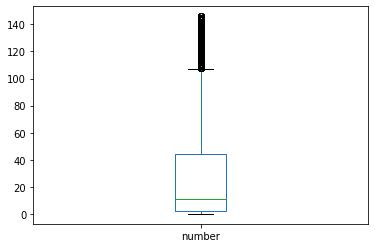

In [0]:
dataset3['number'].plot.box()

Observamos acima a detecção de outliers, onde o tratamento foi realizado e criada uma nova base. A partir de agora a será utilizada essa nova base de dados (dataset3) para apresentarmos informações com dados menos discrepantes.

Verificamos também que na descrição dessa nova base que o valor mínimo (min) de zero siginifica que não houve caso de incêndio, e vale ressaltar a queda drástica do valor máximo (max) de 998.0 para 146.0 após o tratamento.

Abaixo vamos observar onde e em que época ocorreu o mínimo e o máximo de casos de incêncios:

In [0]:
print('Maior número de casos de incêndios registrados: ')
print('Ano: ',dataset3[dataset3['number'] ==  dataset3['number'].max()]['year'].iloc[0])
print('Mês: ',dataset3[dataset3['number'] ==  dataset3['number'].max()]['month'].iloc[0])
print('Estado: ',dataset3[dataset3['number'] ==  dataset3['number'].max()]['state'].iloc[0])
print('Total de casos: ', dataset3['number'].max())

Maior número de casos de incêndios registrados: 
Ano:  2002
Mês:  Julho
Estado:  Amazonas
Total de casos:  146.0


In [0]:
print('Onde não houve caso de incêndio registrado: ')
print('Ano: ',dataset3[dataset3['number'] ==  dataset3['number'].min()]['year'].iloc[0])
print('Mês: ',dataset3[dataset3['number'] ==  dataset3['number'].min()]['month'].iloc[0])
print('Estado: ',dataset3[dataset3['number'] ==  dataset3['number'].min()]['state'].iloc[0])
print('Total de casos: ',dataset3['number'].min())

Onde não houve caso de incêndio registrado: 
Ano:  1998
Mês:  Janeiro
Estado:  Acre
Total de casos:  0.0


In [0]:
# Soma de todos os casos de incêndios registrados dentro do intervalo 
# de 1998 a 2017
dataset3.number.sum()

145763.073

In [0]:
# Variância de todos os casos de incêndios registrados dentro do intervalo 
# de 1998 a 2017
dataset3.var()

year             33.359541
number         1348.002748
number_norm       0.036901
dtype: float64

In [0]:
# Após verificar a variância acima, constatamos através da covariância abaixo 
# que os valores dos atributos das colunas "year", "number" e "number_norm" estão assossiados
dataset3.cov()

,year,number,number_norm
year,33.359541,28.172363,0.147401
number,28.172363,1348.002748,7.052894
number_norm,0.147401,7.052894,0.036901


In [0]:
# Soma dos casos de incêndios por estado
dataset3.groupby('state')['number'].sum()

state
Acre                 2726.030
Alagoas              4139.000
Amapa                2790.576
Amazonas             5111.129
Bahia                6185.226
Ceara                4117.063
Distrito Federal     3059.000
Espirito Santo       5600.000
Goias                6700.520
Maranhao             4365.131
Mato Grosso          9908.028
Minas Gerais         8429.258
Paraiba             14259.918
Pará                 4172.144
Pernambuco           4463.000
Piau                 4854.747
Rio                 20073.865
Rondonia             4425.429
Roraima              6261.074
Santa Catarina       6801.852
Sao Paulo            9071.198
Sergipe              3039.000
Tocantins            5209.885
Name: number, dtype: float64

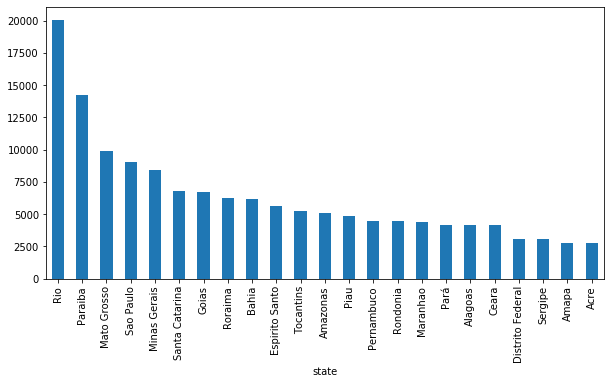

In [0]:
# Gráfico da soma dos casos de incêndios por estado de forma ordenada
dataset3.groupby('state')['number'].sum().nlargest(23).sort_values(ascending=False).plot.bar(figsize=(10,5))

In [0]:
# Média dos casos de incêndios por estado
dataset3.groupby('state')['number'].mean()

state
Acre                13.169227
Alagoas             17.538136
Amapa               14.310646
Amazonas            27.929667
Bahia               48.702567
Ceara               22.746204
Distrito Federal    12.961864
Espirito Santo      23.829787
Goias               40.609212
Maranhao            22.500675
Mato Grosso         36.560989
Minas Gerais        51.086412
Paraiba             38.749777
Pará                21.071434
Pernambuco          25.502857
Piau                28.225273
Rio                 32.587443
Rondonia            22.127145
Roraima             34.591569
Santa Catarina      34.180161
Sao Paulo           63.434951
Sergipe             12.768908
Tocantins           29.105503
Name: number, dtype: float64

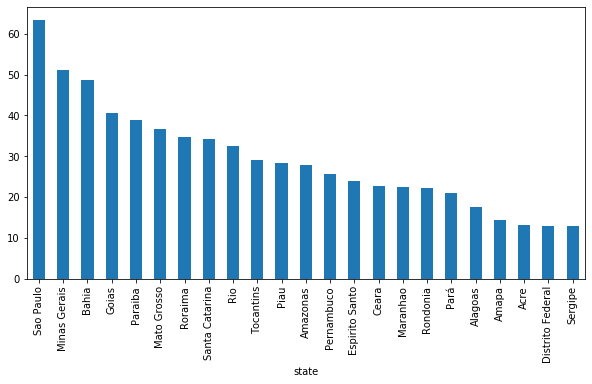

In [0]:
# Gráfico da média dos casos de incêndios por estado de forma ordenada
dataset3.groupby('state')['number'].mean().nlargest(23).sort_values(ascending=False).plot.bar(figsize=(10,5))

In [0]:
# Mediana dos casos de incêndio por estado
dataset3.groupby('state')['number'].median()

state
Acre                 1.9760
Alagoas              9.5000
Amapa                2.0000
Amazonas            10.0000
Bahia               24.0000
Ceara                5.0000
Distrito Federal     2.0000
Espirito Santo      12.0000
Goias               29.0000
Maranhao             5.0000
Mato Grosso          8.9800
Minas Gerais        48.0000
Paraiba             27.5000
Pará                 7.6015
Pernambuco          11.0000
Piau                12.0000
Rio                 19.0000
Rondonia             8.0000
Roraima             14.0000
Santa Catarina      26.0000
Sao Paulo           61.0000
Sergipe              3.0000
Tocantins            8.0000
Name: number, dtype: float64

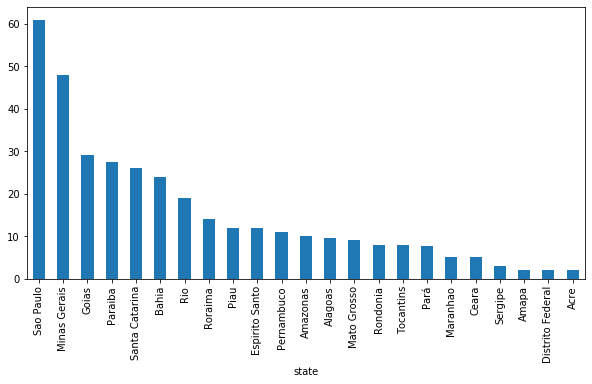

In [0]:
# Gráfico da mediana dos casos de incêndios por estado de forma ordenada
dataset3.groupby('state')['number'].median().nlargest(23).sort_values(ascending=False).plot.bar(figsize=(10,5))

In [0]:
# Desvio Padrão dos casos de incêndio por estado
dataset3.groupby('state')['number'].std()

state
Acre                27.901185
Alagoas             22.012246
Amapa               30.036604
Amazonas            36.248547
Bahia               51.276738
Ceara               35.842120
Distrito Federal    24.214349
Espirito Santo      28.161560
Goias               40.049798
Maranhao            34.422212
Mato Grosso         44.782464
Minas Gerais        46.016341
Paraiba             39.679105
Pará                29.916628
Pernambuco          33.628442
Piau                34.460790
Rio                 35.016536
Rondonia            33.880070
Roraima             42.024621
Santa Catarina      30.258540
Sao Paulo           38.139779
Sergipe             19.497083
Tocantins           37.687218
Name: number, dtype: float64

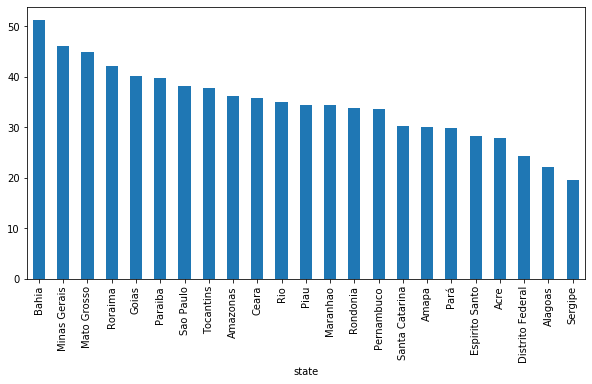

In [0]:
# Gráfico do desvio padrão dos casos de incêndios por estado de forma ordenada
dataset3.groupby('state')['number'].std().nlargest(23).sort_values(ascending=False).plot.bar(figsize=(10,5))

Nos gráficos acima observamos a soma, média, mediana, desvio padrão, variância e covariância. Verificamos que o Rio de Janeiro possui maior número de casos de incêndios registrados, e que São Paulo registrou a maior média e mediana. Apesar disso, Mato Grosso é o estado que possui maior consistência de casos de incêndios em comparação com Rio e São Paulo, devido a sua maior variabilidade dos dados, como mostrado no gráfico abaixo:

Text(0, 0.5, 'Casos de incêncios')

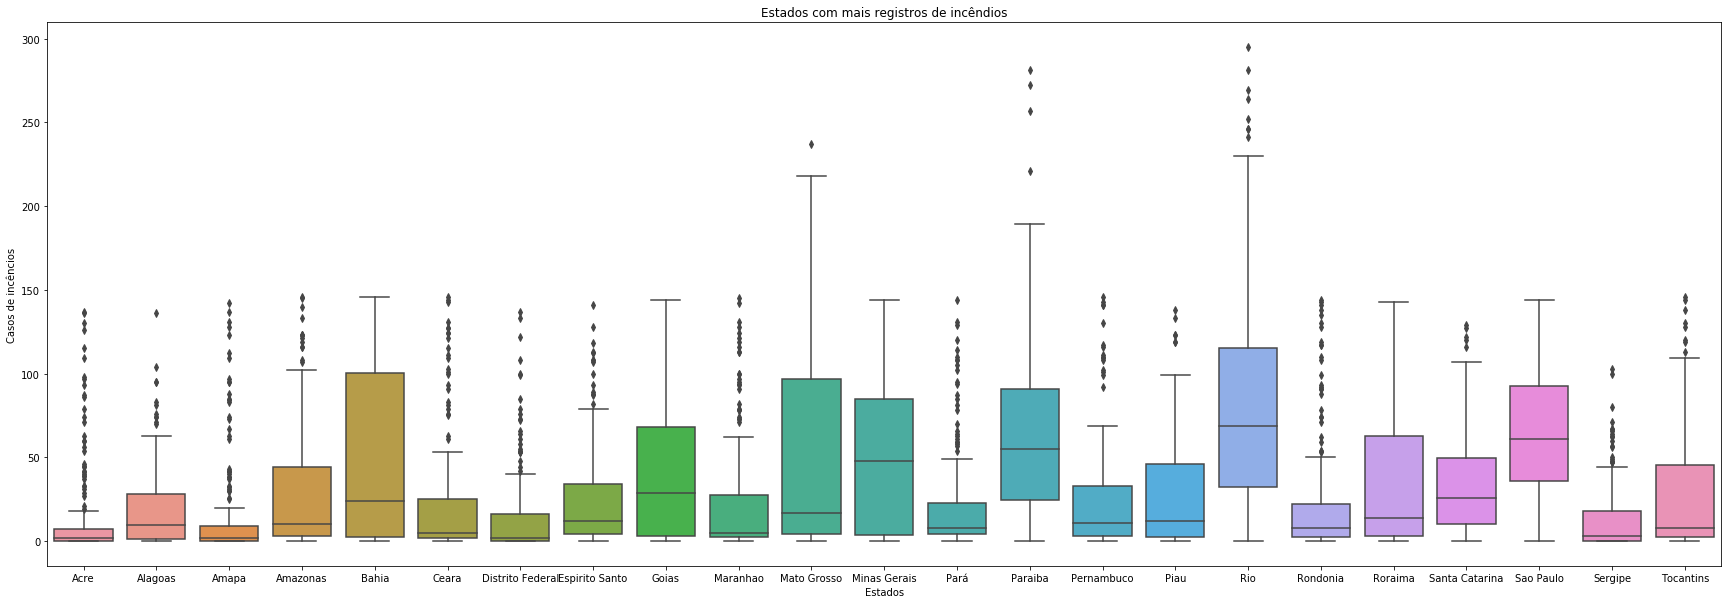

In [0]:
# Junção dos valores dos atributos das colunas year, state e month
juncao_valores = dataset3.groupby(by = ['year','state', 'month']).sum().reset_index()
plt.figure(figsize=(30,10))
sns.boxplot(x = 'state', order = ['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], 
            y = 'number', data = juncao_valores)

plt.title('Estados com mais registros de incêndios', fontsize = 12)
plt.xlabel('Estados', fontsize = 10)
plt.ylabel('Casos de incêncios', fontsize =10)

No gráfico abaixo, observamos também os casos de maiores registros de incêndios por estado, destacando em vermelho aqueles estados que fazem parte direta (denominados de "Amazonia Legal") da floresta amazônica.

Text(0.5, 0, 'Estados')

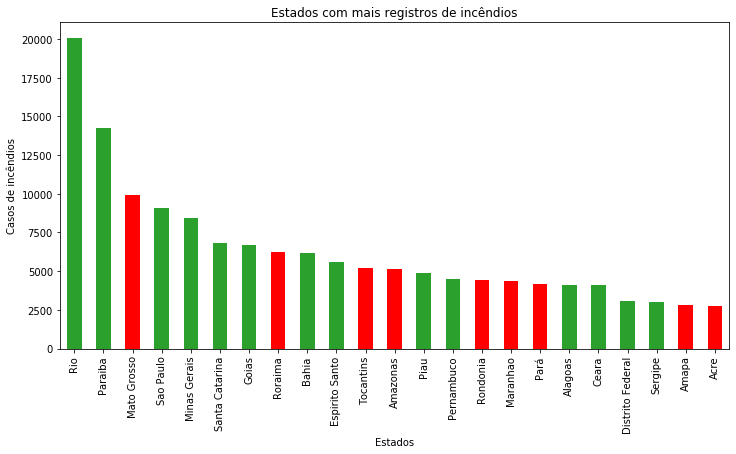

In [0]:
estados_incendios = ['Amazonas', 'Pará', 'Roraima', 'Amapa', 'Rondonia', 'Acre', 'Tocantins', 'Mato Grosso', 'Maranhao']

estados = dataset3.groupby('state')['number'].sum().sort_values(ascending=False)

ax = plt.gca()
colors = ['C2' if i not in estados_incendios else 'r' for i in estados.index]
estados.plot(kind='bar',ax=ax,color=colors, figsize=(12, 6))
h,l = ax.get_legend_handles_labels()
ax.set_title("Estados com mais registros de incêndios")
ax.set_ylabel('Casos de incêndios')
ax.set_xlabel('Estados')

O gráfico a seguir mostra quais são os piores meses de casos de incêndios registrados, de acordo com a soma dos números de incêndios maiores que a média, levando em consideração o desvio padrão:

Meses com mais registros de incêndios: 


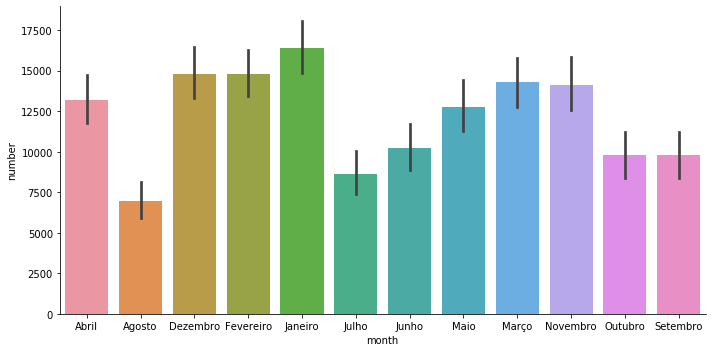

In [0]:
maior_numero_incendios_mes = dataset3.groupby(['month'], as_index=False).sum() 
maior_numero_incendios_mes.drop('year',axis=1, inplace=True)

meses_mais_incendios = maior_numero_incendios_mes[maior_numero_incendios_mes['number']>maior_numero_incendios_mes['number'].mean()+maior_numero_incendios_mes['number'].std()]
print('Meses com mais registros de incêndios: ')

sns.catplot(x='month', y='number', kind='bar',data=dataset3[['month','number']], aspect=2, estimator=sum);

No gráfico a seguir, comparamos o total de casos de incêndios no país com os estados que fazem parte da Floresta Amazônica. 

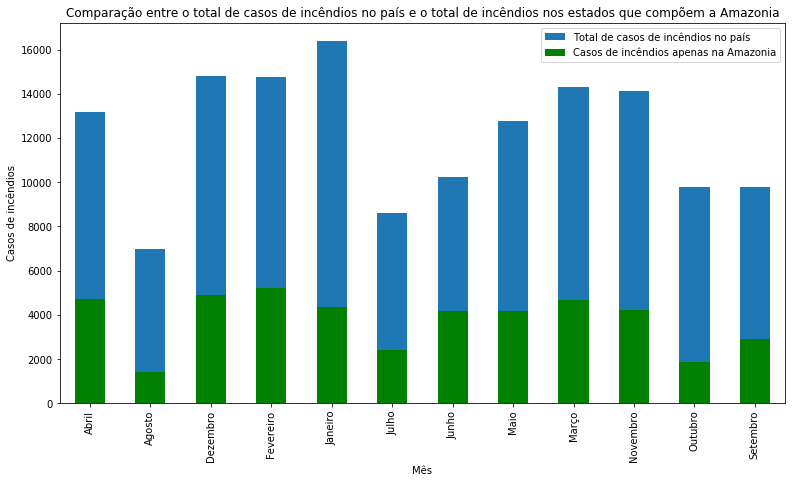

In [0]:
casos_de_incendios_mes = dataset3.groupby('month')['number'].sum()
casos_de_incendios_amazonia = dataset3[dataset3.state.isin(estados_incendios)].groupby('month')['number'].sum()

ax = plt.gca()
casos_de_incendios_mes.plot(kind='bar',x='month',y='number', ax=ax, stacked=True, figsize=(13, 7))
casos_de_incendios_amazonia.plot(kind='bar',x='month',y='number', ax=ax, stacked=True, color='g', figsize=(13, 7))
ax.set_title("Comparação entre o total de casos de incêndios no país e o total de incêndios nos estados que compõem a Amazonia")
ax.set_ylabel('Casos de incêndios')
ax.set_xlabel('Mês')
ax.legend(["Total de casos de incêndios no país", "Casos de incêndios apenas na Amazonia"])

Verificamos abaixo o total de casos de incêndios no país, onde pelo gráfico podemos observar os anos considerados mais críticos, ou seja, que houveram mais casos de incêndios no país.
Constata-se que entre os anos de 2011 e 2016 foram os mais críticos.

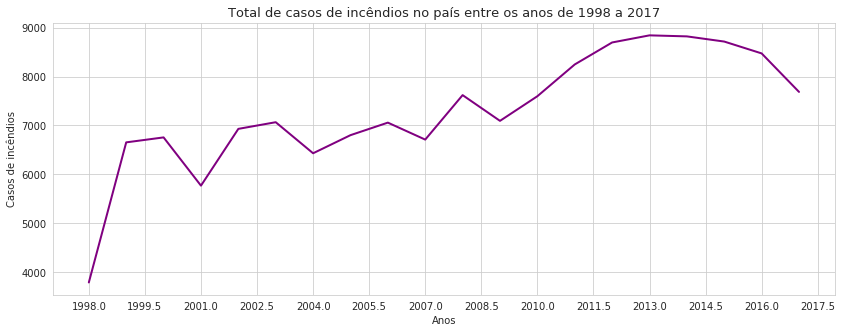

In [0]:
sns.set_style('whitegrid')

from matplotlib.pyplot import MaxNLocator

plt.figure(figsize=(14,5))

ax = sns.lineplot(x = 'year', y = 'number', data = juncao_valores, estimator = 'sum', color = 'purple', lw = 2, 
                  err_style = None)

plt.title('Total de casos de incêndios no país entre os anos de 1998 a 2017', fontsize = 13)
plt.xlabel('Anos', fontsize = 10)
plt.ylabel('Casos de incêndios', fontsize = 10)

ax.xaxis.set_major_locator(plt.MaxNLocator(19))